<font color=Green size=10> **Gensim - Intro** </font>

### —— 何数学

###  **自然语言处理**  
* **文本预处理**  
* **Similarity query：TF-IDF** 
* **Topic modeling：LDA, LSI**  
* **Word embedding：Word2Vec, FastText, GloVe**  
* **Sentence embeddings: Doc2Vec** 
* **Similarity metrics: cosine similarity / soft cosine similarity**
* **Summarize: Textrank**
* **可流式处理语料库，无需把整个语料库加载到内存中https://radimrehurek.com/gensim/auto_examples/core/run_corpora_and_vector_spaces.html#corpus-streaming-tutorial**

<font color=Green size=5> **gensim基础概念** </font>
* **Tokens：即words，分开的单词（Tokenize，即分词）**
* **Document：例如一条评论、一段话、一篇新闻文章、一本书**
* **Corpus：语料库，document的集合，a bag of words（词袋），如某个作者所有书目的列表、维基百科的所有文章的列表、或者某个人的所有文字微博** ——bag of words 即不考虑每个单词之间的序列信息。bag of words 中每个单词包含的信息有：唯一标识的id、在整个语料库中出现的频数。
* **Dictionary：Dictionary将每个word映射到唯一id** 
* **Vector：文本在向量空间中的表示** ——Dictionary or Vector? 只有基于向量才能计算距离、相似性等信息。

<font color=Green size=5> **gensim基础操作** </font>

* **从 list 新建 document，`doc.split()` 分词，`gensim.corpora.Dictionary()` 新建字典**

In [1]:
import gensim
from gensim import corpora
from pprint import pprint

# Create a dictionary from a list of sentences
documents = ["The Saudis are preparing a report that will acknowledge that", 
             "Saudi journalist Jamal Khashoggi's death was the result of an", 
             "interrogation that went wrong, one that was intended to lead", 
             "to his abduction from Turkey, according to two sources."]

# Tokenize(split) the sentences into words
texts = [[text for text in doc.split()] for doc in documents]
print(texts[0],"\n")

# Create dictionary
dictionary = corpora.Dictionary(texts)

# Get information about the dictionary
print(dictionary)

['The', 'Saudis', 'are', 'preparing', 'a', 'report', 'that', 'will', 'acknowledge', 'that'] 

Dictionary(33 unique tokens: ['Saudis', 'The', 'a', 'acknowledge', 'are']...)


* **`dictionary.token2id` 查看每个单词对应的id：**

In [2]:
# Show the word to id map
pprint(dictionary.token2id)

{'Jamal': 9,
 "Khashoggi's": 10,
 'Saudi': 11,
 'Saudis': 0,
 'The': 1,
 'Turkey,': 26,
 'a': 2,
 'abduction': 27,
 'according': 28,
 'acknowledge': 3,
 'an': 12,
 'are': 4,
 'death': 13,
 'from': 29,
 'his': 30,
 'intended': 19,
 'interrogation': 20,
 'journalist': 14,
 'lead': 21,
 'of': 15,
 'one': 22,
 'preparing': 5,
 'report': 6,
 'result': 16,
 'sources.': 31,
 'that': 7,
 'the': 17,
 'to': 23,
 'two': 32,
 'was': 18,
 'went': 24,
 'will': 8,
 'wrong,': 25}


* **` dictionary.add_documents ` 加入新单词，更新已经存在的字典：**

In [3]:
documents_2 = ["The intersection graph of paths in trees",
               "Graph minors IV Widths of trees and well quasi ordering",
               "Graph minors A survey"]

texts_2 = [[text for text in doc.split()] for doc in documents_2]

dictionary.add_documents(texts_2)

# the dictionary is updated with the new words (tokens).
print(dictionary)

# print(dictionary.token2id)

Dictionary(48 unique tokens: ['Saudis', 'The', 'a', 'acknowledge', 'are']...)


当然，这种粗糙的预处理是远远不够的，比如这里'The'的id是1，'the'的id是17。

* **从一个text file新建 document，生成对应字典** 
    * **`smart_open()` from `smart_open` package: it lets you open and read large files line-by-line from a variety of sources such as S3, HDFS, WebHDFS, HTTP, or local and compressed files.**
    * **`simple_preprocess`：初步的文本处理，分词，去标点，转小写，忽略太长或太短的单词(默认值2~15之外)**
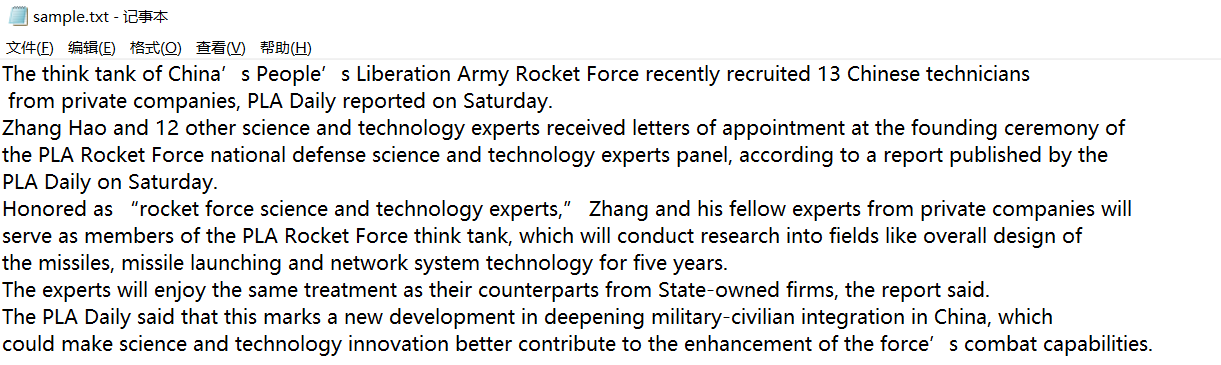

In [4]:
from gensim.utils import simple_preprocess
from smart_open import smart_open  
import os

# Create gensim dictionary form a single tet file
dictionary = corpora.Dictionary(simple_preprocess(line, deacc=True) for line in open('E:\sample.txt', encoding='utf-8'))
print(dictionary)
# Token to Id map
dictionary.token2id

Dictionary(93 unique tokens: ['army', 'china', 'chinese', 'force', 'liberation']...)


{'army': 0,
 'china': 1,
 'chinese': 2,
 'force': 3,
 'liberation': 4,
 'of': 5,
 'people': 6,
 'recently': 7,
 'recruited': 8,
 'rocket': 9,
 'tank': 10,
 'technicians': 11,
 'the': 12,
 'think': 13,
 'companies': 14,
 'daily': 15,
 'from': 16,
 'on': 17,
 'pla': 18,
 'private': 19,
 'reported': 20,
 'saturday': 21,
 'and': 22,
 'appointment': 23,
 'at': 24,
 'ceremony': 25,
 'experts': 26,
 'founding': 27,
 'hao': 28,
 'letters': 29,
 'other': 30,
 'received': 31,
 'science': 32,
 'technology': 33,
 'zhang': 34,
 'according': 35,
 'by': 36,
 'defense': 37,
 'national': 38,
 'panel': 39,
 'published': 40,
 'report': 41,
 'to': 42,
 'as': 43,
 'fellow': 44,
 'his': 45,
 'honored': 46,
 'will': 47,
 'conduct': 48,
 'design': 49,
 'fields': 50,
 'into': 51,
 'like': 52,
 'members': 53,
 'overall': 54,
 'research': 55,
 'serve': 56,
 'which': 57,
 'five': 58,
 'for': 59,
 'launching': 60,
 'missile': 61,
 'missiles': 62,
 'network': 63,
 'system': 64,
 'years': 65,
 'counterparts': 66,
 '

* **从多个 text file 中每次读入一个，生成字典**
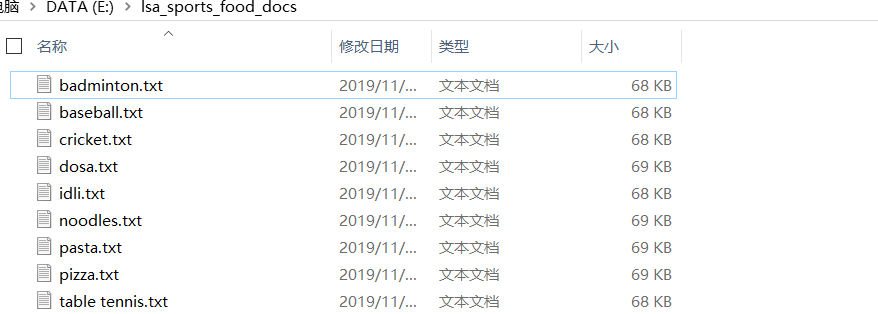

In [5]:
class ReadTxtFiles(object):
    def __init__(self, dirname):
        self.dirname = dirname

    def __iter__(self):
        for fname in os.listdir(self.dirname):
            for line in open(os.path.join(self.dirname, fname), encoding='latin'):
                yield simple_preprocess(line)

path_to_text_directory = "E:\lsa_sports_food_docs" # tex file所在文件夹路径

dictionary = corpora.Dictionary(ReadTxtFiles(path_to_text_directory))

# Token to Id map
dictionary.token2id

{'doctype': 0,
 'html': 1,
 'en': 2,
 'lang': 3,
 'head': 4,
 'charset': 5,
 'meta': 6,
 'utf': 7,
 'com': 8,
 'dns': 9,
 'github': 10,
 'githubassets': 11,
 'href': 12,
 'https': 13,
 'link': 14,
 'prefetch': 15,
 'rel': 16,
 'avatars': 17,
 'amazonaws': 18,
 'cloud': 19,
 'images': 20,
 'user': 21,
 'all': 22,
 'anonymous': 23,
 'assets': 24,
 'bae': 25,
 'bzxfkyud': 26,
 'crossorigin': 27,
 'css': 28,
 'dhwcxhww': 29,
 'fb': 30,
 'frameworks': 31,
 'gtnd': 32,
 'integrity': 33,
 'media': 34,
 'rm': 35,
 'rq': 36,
 'sha': 37,
 'stylesheet': 38,
 'vew': 39,
 'yevws': 40,
 'chtfvyeub': 41,
 'ea': 42,
 'efb': 43,
 'fd': 44,
 'fmg': 45,
 'iick': 46,
 'kw': 47,
 'saqy': 48,
 'site': 49,
 'sqfl': 50,
 'st': 51,
 'swxkub': 52,
 'vz': 53,
 'xmfq': 54,
 'xod': 55,
 'yr': 56,
 'bx': 57,
 'ddnchjtev': 58,
 'drwxu': 59,
 'ed': 60,
 'endlfsood': 61,
 'gth': 62,
 'hu': 63,
 'ijxiamnj': 64,
 'iocctjq': 65,
 'qa': 66,
 'tjiez': 67,
 'uhqaxdsd': 68,
 'uigu': 69,
 'um': 70,
 'content': 71,
 'device': 

* **Dictionary → Corpus： `corpora.Dictionary().doc2bow` 新建 corpus(a bag of words, BoW)**  
—— How to interpret？

In [6]:
# List with 2 sentences
my_docs = ["Who let the dogs out?",
           "Who? Who? Who? Who?"]

# Tokenize the docs
tokenized_list = [simple_preprocess(doc) for doc in my_docs]
print("tokenized_list:",tokenized_list,"\n")

# Create the Corpus
mydict = corpora.Dictionary(tokenized_list)
print("mydict.token2id:",mydict.token2id,"\n")
mycorpus = [mydict.doc2bow(doc) for doc in tokenized_list]

# 或是
mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]

print("mycorpus:",mycorpus)

# The (0, 1) in line 1 means, the word with id=0 appears once in the 1st document.
# Likewise, the (4, 4) in the second list item means the word with id 4 appears 4 times in the second document.

tokenized_list: [['who', 'let', 'the', 'dogs', 'out'], ['who', 'who', 'who', 'who']] 

mydict.token2id: {'dogs': 0, 'let': 1, 'out': 2, 'the': 3, 'who': 4} 

mycorpus: [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)], [(4, 4)]]


* **将corpus转化为更直观的形式**  

In [7]:
word_counts = [[(mydict[id], count) for id, count in line] for line in mycorpus]
pprint(word_counts)

[[('dogs', 1), ('let', 1), ('out', 1), ('the', 1), ('who', 1)], [('who', 4)]]


* **从 text file建立corpus**

    * **The `__iter__()` from `BoWCorpus` reads a line from the file, process it to a list of words using `simple_preprocess()` and pass that to the `dictionary.doc2bow()`.**

In [8]:
from gensim.utils import simple_preprocess
from smart_open import smart_open
import nltk
nltk.download('stopwords')  # run once
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


class BoWCorpus(object):
    def __init__(self, path, dictionary):
        self.filepath = path
        self.dictionary = dictionary

    def __iter__(self):
        global mydict  # OPTIONAL, only if updating the source dictionary.
        for line in smart_open(self.filepath, encoding='latin'):
            # tokenize
            tokenized_list = simple_preprocess(line, deacc=True)

            # create bag of words
            bow = self.dictionary.doc2bow(tokenized_list, allow_update=True)

            # update the source dictionary (OPTIONAL)
            mydict.merge_with(self.dictionary)

            # lazy return the BoW
            yield bow


# Create the Dictionary
mydict = corpora.Dictionary()

# Create the Corpus
bow_corpus = BoWCorpus('E:\sample.txt', dictionary=mydict)  # memory friendly

# Print the token_id and count for each line.
for line in bow_corpus:
    print(line)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]
[(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]
[(5, 2), (12, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)]
[(3, 1), (9, 1), (12, 2), (18, 1), (22, 1), (26, 1), (32, 1), (33, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1)]
[(15, 1), (17, 1), (18, 1), (21, 1)]
[(3, 1), (9, 1), (14, 1), (16, 1), (19, 1), (22, 2), (26, 2), (32, 1), (33, 1), (34, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1)]
[(3, 1), (5, 2), (9, 1), (10, 1), (12, 1), (13, 1), (18, 1), (43, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1)]
[(12, 1), (22, 1), (33, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)]
[(12, 3), (16, 1), (26, 1), (41, 1), (43, 1), (47, 1), (66, 1), (67, 1), (68, 1), (69, 1), (

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hsx10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
E:\anaconda\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


* **保存 / 加载 dictionary、corpus**   

In [ ]:
# save a gensim dictionary and corpus to disk and load them back

# Save the Dict and Corpus
mydict.save('mydict.dict')  # save dict to disk
corpora.MmCorpus.serialize('bow_corpus.mm', bow_corpus)  # save corpus to disk

# Load them back
loaded_dict = corpora.Dictionary.load('mydict.dict')

corpus = corpora.MmCorpus('bow_corpus.mm')
for line in corpus:
    print(line)

<font color=Green size = 6> **Phraser models** </font>  
##   to create bigrams and trigrams

* **bigram / trigrams：由两/三个单词组成的有特定意义的词组，如 'French Revolution' ≠ 'French' + 'Revolution'**   
* **在bag-of-words models中尤其重要**
* **由`gensim.models.phrases.Phrases`实现**

In [11]:
import gensim.downloader as api

dataset = api.load("text8") # text8 dataset: First 100,000,000 bytes of plain text from Wikipedia
dataset = [wd for wd in dataset]

# dct = corpora.Dictionary(dataset)
# corpus = [dct.doc2bow(line) for line in dataset] # 无需在建立 bigrams 中使用

# Build the bigram models
bigram = gensim.models.phrases.Phrases(dataset, min_count=3, threshold=10)
# min_count: Ignore all words and bigrams with total collected count lower than this value.
# threshold: Represent a score threshold for forming the phrases (higher means fewer phrases).

# Construct bigram
print(bigram[dataset[0]])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working_class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans_culottes', 'of', 'the', 'french_revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative_way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken_up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived_from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political_philosophy', 'is', 'the', 'belief_that', 'rulers', 'are', 'unnecessary', 'and', 'should_be', 'abolished', 'although', 'there_are', 'differing_interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers_to', 'related', 'social_movements', 'that', 'advocate',

In [12]:
# Build the trigram models
trigram = gensim.models.phrases.Phrases(bigram[dataset], threshold=10)

# Construct trigram
print(trigram[bigram[dataset[0]]])

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working_class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans_culottes', 'of', 'the', 'french_revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative_way', 'to_describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also_been', 'taken_up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived_from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political_philosophy', 'is', 'the', 'belief_that', 'rulers', 'are', 'unnecessary', 'and', 'should_be', 'abolished', 'although', 'there_are', 'differing_interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers_to', 'related', 'social_movements', 'that', 'advocate', 'the'

<font color=Green size = 6> **TF-IDF matrix** </font>  
##   Term Frequency 词频 – Inverse Document Frequency 逆文本频率指数

* **idea：基于bag-of-words model，但不同的是，IFIDF降低了频繁出现在文档中的tokens (words)的权重，如 the、a。**   
* **评估每个word对于所处文件的重要程度。字词的重要性随着它在文件中出现的次数成正比增加，但同时会随着它在语料库中出现的频率成反比下降。**
* **应用: TF-IDF加权的各种形式常被搜索引擎应用，作为文件与用户查询之间相关程度的度量或评级。除了TF-IDF以外，搜索引擎还会使用基于链接分析的评级方法，以确定文件在搜寻结果中出现的顺序**
* **计算方式：gensim：SMART Information retrieval system,详见  https://en.wikipedia.org/wiki/SMART_Information_Retrieval_System**

In [13]:
from gensim import models
help(models.TfidfModel)

Help on class TfidfModel in module gensim.models.tfidfmodel:

class TfidfModel(gensim.interfaces.TransformationABC)
 |  TfidfModel(corpus=None, id2word=None, dictionary=None, wlocal=<function identity at 0x000001ABC9A530D0>, wglobal=<function df2idf at 0x000001ABD3869620>, normalize=True, smartirs=None, pivot=None, slope=0.25)
 |  
 |  Objects of this class realize the transformation between word-document co-occurrence matrix (int)
 |  into a locally/globally weighted TF-IDF matrix (positive floats).
 |  
 |  Examples
 |  --------
 |  .. sourcecode:: pycon
 |  
 |      >>> import gensim.downloader as api
 |      >>> from gensim.models import TfidfModel
 |      >>> from gensim.corpora import Dictionary
 |      >>>
 |      >>> dataset = api.load("text8")
 |      >>> dct = Dictionary(dataset)  # fit dictionary
 |      >>> corpus = [dct.doc2bow(line) for line in dataset]  # convert corpus to BoW format
 |      >>>
 |      >>> model = TfidfModel(corpus)  # fit model
 |      >>> vector = mod

In [14]:
# get the TFIDF weights
from gensim import models
import numpy as np

documents = ["This This is the first line",
             "This is the second sentence",
             "This third document"]

# Create the Dictionary and Corpus
mydict = corpora.Dictionary([simple_preprocess(line) for line in documents])
corpus = [mydict.doc2bow(simple_preprocess(line)) for line in documents]

# Show the Word Weights in Corpus
print("Show the Word Weights in Corpus")
for doc in corpus:
    print([[mydict[id], freq] for id, freq in doc])

# Create the TF-IDF model
tfidf = models.TfidfModel(corpus, smartirs='ntc')

# Show the TF-IDF weights
print("\nShow the TF-IDF weights")
for doc in tfidf[corpus]:
    print([[mydict[id], np.around(freq, decimals=2)] for id, freq in doc])

Show the Word Weights in Corpus
[['first', 1], ['is', 1], ['line', 1], ['the', 1], ['this', 2]]
[['is', 1], ['the', 1], ['this', 1], ['second', 1], ['sentence', 1]]
[['this', 1], ['document', 1], ['third', 1]]

Show the TF-IDF weights
[['first', 0.61], ['is', 0.31], ['line', 0.61], ['the', 0.31], ['this', 0.25]]
[['is', 0.31], ['the', 0.31], ['this', 0.13], ['second', 0.63], ['sentence', 0.63]]
[['this', 0.15], ['document', 0.7], ['third', 0.7]]


<font color=Green size = 6> **LDA** </font>  
##    Latent Dirichlet Allocation - Topic Modeling


* **idea：document 看作 一定比例的topics的集合；每个 topic 看作一定比例的 keywords的集合。**   
* **需要指定 topic 的个数；topic model 会提供每个 topic 的 keywords 和 每个 document 中各主题所占百分比。**
* **模型的质量高度依赖于文本预处理的好坏。**
* **一些理论: <<从LSA/LSI潜在语义索引到LDA狄利克雷分布>> https://www.jianshu.com/p/283691c40fa8**
* **超详细教程见:https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/ ；  
  https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/**

#### Step 0：导入包、停用词
   * **nltk也有停用词，但仍包含如 many、also、first 等很多无用词，LDA 模型训练完效果并不好，需要手动再把这些词添加进 stopwords**

In [12]:
from gensim.models import LdaModel, LdaMulticore
import gensim.downloader as api
from gensim.utils import simple_preprocess, lemmatize
from gensim.parsing.preprocessing import STOPWORDS
import re
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s')
logging.root.setLevel(level=logging.INFO)
stop_words = list(STOPWORDS) + ['com', 'edu', 'subject', 'lines', 'organization', 'would', 'article', 'could']

In [ ]:
# 若使用nltk中的停用词
# from nltk.corpus import stopwords
# stop_words = stopwords.words('english')
# stop_words = stop_words + ['com', 'edu', 'subject', 'lines', 'organization', 'would', 'article', 'could']

#### Step 1：导入数据集

In [10]:
dataset = api.load("text8")
data = [d for d in dataset]

#### Step 2：文本预处理：去除停用词、lemmatize 词性还原
  * <font color=red> **★★★ lemmatize 依赖于 pattern 包，因此先在 cmd 中 pip install Pattern。 ★★★** </font>
  * **POS (Part-of-speech) 词性 e.g. Nouns (NN), Adjectives (JJ) and Pronouns (RB)**
  * **lemmatize：feet → foot，did → do，better → good 等**
  * **bigrams, trigrams等, 这里先省略了**

In [15]:
# 查看 lemmatize 返回形式
print(lemmatize('feet'))
print(lemmatize('feet')[0].split(b'/')[0])
print(lemmatize('feet')[0].split(b'/')[0].decode('utf-8'))

[b'foot/NN']
b'foot'
foot


In [19]:
# 查看原文本
print(data[0][:20]) 

['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english']


In [18]:
data_processed = []

for i, doc in enumerate(data[0:1000:10]):
    doc_out = []
    for wd in doc:
        if wd not in stop_words:  # remove stopwords
            lemmatized_word = lemmatize(wd, allowed_tags=re.compile('(NN|JJ|RB)'))  # lemmatize，这里只对这三种词性的词语做还原
            if lemmatized_word:
                doc_out = doc_out + [lemmatized_word[0].split(b'/')[0].decode('utf-8')]
        else:
            continue
    data_processed.append(doc_out)

# Print a small sample    
print(data_processed[0][:20]) 

['anarchism', 'originated', 'term', 'abuse', 'early', 'class', 'radical', 'digger', 'english', 'revolution', 'san', 'culotte', 'french', 'revolution', 'term', 'pejorative', 'way', 'act', 'violent', 'society']


#### Step 3：基于上面得到的 list of words → 产生 Dictionary and Corpus，inputs of LDA model

In [19]:
dct = corpora.Dictionary(data_processed)
corpus = [dct.doc2bow(line) for line in data_processed]

2019-12-08 13:53:11,392 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-12-08 13:53:11,849 : INFO : built Dictionary(39048 unique tokens: ['ability', 'able', 'abnormal', 'abolition', 'absence']...) from 100 documents (total 408061 corpus positions)


#### Step 4：`LdaMulticore()` 训练 LDA 模型
   * **Multicore：并行LDA加快处理速度；普通为`gensim.models.ldamodel.LdaModel()`**
   * **`lda_model.print_topics()`：这7个话题的每个话题是由哪些关键词以何种比例构成**

In [39]:
help(LdaMulticore) 

Help on class LdaMulticore in module gensim.models.ldamulticore:

class LdaMulticore(gensim.models.ldamodel.LdaModel)
 |  LdaMulticore(corpus=None, num_topics=100, id2word=None, workers=None, chunksize=2000, passes=1, batch=False, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, random_state=None, minimum_probability=0.01, minimum_phi_value=0.01, per_word_topics=False, dtype=<class 'numpy.float32'>)
 |  
 |  An optimized implementation of the LDA algorithm, able to harness the power of multicore CPUs.
 |  Follows the similar API as the parent class :class:`~gensim.models.ldamodel.LdaModel`.
 |  
 |  Method resolution order:
 |      LdaMulticore
 |      gensim.models.ldamodel.LdaModel
 |      gensim.interfaces.TransformationABC
 |      gensim.utils.SaveLoad
 |      gensim.models.basemodel.BaseTopicModel
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, corpus=None, num_topics=100, id2word=None, workers=

In [22]:
# # 这里的输出结果是基于去除nltk中的停用词的，可看到also first many 等词都作为了关键字
# lda_model = LdaMulticore(corpus=corpus,
#                          id2word=dct,
#                          random_state=100,
#                          num_topics=7,
#                          passes=10, 
#                          chunksize=1000, 
#                          batch=False,
#                          alpha='asymmetric',
#                          decay=0.5,
#                          offset=64,
#                          eta=None,
#                          eval_every=0,
#                          iterations=100,
#                          gamma_threshold=0.001,
#                          per_word_topics=True)

# # save the model
# # lda_model.save('lda_model.model')

# # See the topics
# lda_model.print_topics(-1) #  -1 : all topics will be in result; 还可输入指定number of words to be included per topics

2019-11-26 02:19:05,416 : INFO : using asymmetric alpha [0.26219156, 0.19027454, 0.14931786, 0.12287004, 0.104381524, 0.090729296, 0.080235206]
2019-11-26 02:19:05,417 : INFO : using symmetric eta at 0.14285714285714285
2019-11-26 02:19:05,427 : INFO : using serial LDA version on this node
2019-11-26 02:19:05,838 : INFO : running online LDA training, 7 topics, 10 passes over the supplied corpus of 100 documents, updating every 3000 documents, evaluating every ~0 documents, iterating 100x with a convergence threshold of 0.001000
2019-11-26 02:19:05,842 : INFO : training LDA model using 3 processes
2019-11-26 02:19:05,917 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #100/100, outstanding queue size 1
2019-11-26 02:19:13,035 : INFO : topic #6 (0.080): 0.001*"also" + 0.001*"american" + 0.001*"state" + 0.001*"person" + 0.001*"time" + 0.001*"world" + 0.001*"year" + 0.001*"war" + 0.001*"many" + 0.001*"first"
2019-11-26 02:19:13,037 : INFO : topic #5 (0.091): 0.001*"also" +

[(0,
  '0.001*"also" + 0.000*"first" + 0.000*"state" + 0.000*"american" + 0.000*"time" + 0.000*"book" + 0.000*"year" + 0.000*"many" + 0.000*"person" + 0.000*"new"'),
 (1,
  '0.001*"also" + 0.001*"state" + 0.001*"ammonia" + 0.000*"first" + 0.000*"many" + 0.000*"american" + 0.000*"war" + 0.000*"time" + 0.000*"year" + 0.000*"name"'),
 (2,
  '0.005*"also" + 0.004*"american" + 0.004*"state" + 0.004*"first" + 0.003*"year" + 0.003*"many" + 0.003*"time" + 0.003*"new" + 0.003*"war" + 0.003*"person"'),
 (3,
  '0.001*"atheism" + 0.001*"also" + 0.001*"first" + 0.000*"american" + 0.000*"atheist" + 0.000*"god" + 0.000*"state" + 0.000*"many" + 0.000*"new" + 0.000*"year"'),
 (4,
  '0.001*"state" + 0.001*"also" + 0.001*"many" + 0.000*"world" + 0.000*"agave" + 0.000*"time" + 0.000*"new" + 0.000*"war" + 0.000*"god" + 0.000*"person"'),
 (5,
  '0.001*"also" + 0.001*"abortion" + 0.001*"first" + 0.001*"american" + 0.000*"state" + 0.000*"many" + 0.000*"year" + 0.000*"time" + 0.000*"war" + 0.000*"person"'),
 (

In [20]:
# 这里的输出结果是基于gensim中的停用词的，可以看到解释性更好
lda_model = LdaMulticore(corpus=corpus,
                         id2word=dct,
                         random_state=100,
                         num_topics=7,
                         passes=10, 
                         chunksize=1000, 
                         batch=False,
                         alpha='asymmetric',
                         decay=0.5,
                         offset=64,
                         eta=None,
                         eval_every=0,
                         iterations=100,
                         gamma_threshold=0.001,
                         per_word_topics=True)

# save the model
# lda_model.save('lda_model.model')

# See the topics
lda_model.print_topics(-1) #  -1 : all topics will be in result; 还可输入指定number of words to be included per topics

2019-12-08 13:53:34,710 : INFO : using asymmetric alpha [0.26219156, 0.19027454, 0.14931786, 0.12287004, 0.104381524, 0.090729296, 0.080235206]
2019-12-08 13:53:34,713 : INFO : using symmetric eta at 0.14285714285714285
2019-12-08 13:53:34,732 : INFO : using serial LDA version on this node
2019-12-08 13:53:35,144 : INFO : running online LDA training, 7 topics, 10 passes over the supplied corpus of 100 documents, updating every 3000 documents, evaluating every ~0 documents, iterating 100x with a convergence threshold of 0.001000
2019-12-08 13:53:35,146 : INFO : training LDA model using 3 processes
2019-12-08 13:53:35,236 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #100/100, outstanding queue size 1
2019-12-08 13:53:42,128 : INFO : topic #6 (0.080): 0.001*"state" + 0.001*"game" + 0.001*"year" + 0.000*"time" + 0.000*"american" + 0.000*"country" + 0.000*"person" + 0.000*"war" + 0.000*"french" + 0.000*"city"
2019-12-08 13:53:42,130 : INFO : topic #5 (0.091): 0.001*"time

[(0,
  '0.004*"state" + 0.004*"time" + 0.004*"new" + 0.003*"year" + 0.003*"american" + 0.003*"person" + 0.002*"number" + 0.002*"world" + 0.002*"city" + 0.002*"game"'),
 (1,
  '0.003*"folk" + 0.003*"coup" + 0.003*"music" + 0.003*"cuba" + 0.002*"cuban" + 0.002*"basque" + 0.002*"franco" + 0.002*"apl" + 0.002*"frigate" + 0.002*"year"'),
 (2,
  '0.001*"set" + 0.000*"number" + 0.000*"state" + 0.000*"time" + 0.000*"new" + 0.000*"party" + 0.000*"british" + 0.000*"european" + 0.000*"claudius" + 0.000*"person"'),
 (3,
  '0.006*"island" + 0.005*"french" + 0.004*"british" + 0.003*"state" + 0.003*"africa" + 0.003*"year" + 0.003*"atari" + 0.002*"person" + 0.002*"energy" + 0.002*"country"'),
 (4,
  '0.006*"circumcision" + 0.003*"cd" + 0.002*"citizenship" + 0.002*"american" + 0.001*"circumcised" + 0.001*"disc" + 0.001*"infant" + 0.001*"foreskin" + 0.001*"state" + 0.001*"rs"'),
 (5,
  '0.004*"dolphin" + 0.003*"abc" + 0.003*"gold" + 0.002*"faramir" + 0.002*"fortran" + 0.002*"whale" + 0.001*"time" + 0.00

In [21]:
lda_model.print_topics(3,2)

2019-12-08 13:53:54,141 : INFO : topic #6 (0.080): 0.001*"game" + 0.001*"state"
2019-12-08 13:53:54,143 : INFO : topic #1 (0.190): 0.003*"folk" + 0.003*"coup"
2019-12-08 13:53:54,144 : INFO : topic #0 (0.262): 0.004*"state" + 0.004*"time"


[(6, '0.001*"game" + 0.001*"state"'),
 (1, '0.003*"folk" + 0.003*"coup"'),
 (0, '0.004*"state" + 0.004*"time"')]

#### Step 5：解释 LDA 模型输出
   * **The topic(s) that document belongs to along with percentage.**
   * **The topic(s) each word in that document belongs to.**
   * **The topic(s) each word in that document belongs to AND the phi values.**
       * **phi value：the probability of the word belonging to that particular topic. And the sum of phi values for a given word adds up to the number of times that word occurred in that document.**

In [22]:
test_doc = 'island island french british state time new year american'.split()
doc_bow = dct.doc2bow(test_doc)
doc_lda = lda_model[doc_bow]
doc_lda

([(0, 0.332836),
  (1, 0.019223625),
  (2, 0.014942591),
  (3, 0.6054604),
  (4, 0.010439801)],
 [(55, [0, 3]),
  (607, [3, 0]),
  (986, [0, 3]),
  (1385, [3, 0]),
  (1476, [0, 3]),
  (1622, [3, 0]),
  (1804, [3, 0]),
  (2209, [3, 0])],
 [(55, [(0, 0.6159749), (3, 0.383445)]),
  (607, [(0, 0.0870353), (3, 0.9127547)]),
  (986, [(0, 0.6245675), (3, 0.37505046)]),
  (1385, [(0, 0.41347447), (3, 0.58627385)]),
  (1476, [(0, 0.60075533), (3, 0.3988569)]),
  (1622, [(0, 0.4049805), (3, 0.59470224)]),
  (1804, [(0, 0.14660944), (3, 0.8531672)]),
  (2209, [(0, 0.17001499), (3, 1.8298179)])])

In [23]:
pprint([(dct[wd], topic) for wd, topic in doc_lda[1]])
print('-'*80)
pprint([(dct[wd], topic) for wd, topic in doc_lda[2]])

[('american', [0, 3]),
 ('french', [3, 0]),
 ('new', [0, 3]),
 ('state', [3, 0]),
 ('time', [0, 3]),
 ('year', [3, 0]),
 ('british', [3, 0]),
 ('island', [3, 0])]
--------------------------------------------------------------------------------
[('american', [(0, 0.6159749), (3, 0.383445)]),
 ('french', [(0, 0.0870353), (3, 0.9127547)]),
 ('new', [(0, 0.6245675), (3, 0.37505046)]),
 ('state', [(0, 0.41347447), (3, 0.58627385)]),
 ('time', [(0, 0.60075533), (3, 0.3988569)]),
 ('year', [(0, 0.4049805), (3, 0.59470224)]),
 ('british', [(0, 0.14660944), (3, 0.8531672)]),
 ('island', [(0, 0.17001499), (3, 1.8298179)])]


<font color=Green size = 6> **LSI** </font>  
##    Latent Semantic Indexing - Topic Modeling

* **将训练文档向量组成的矩阵SVD分解(奇异值分解)，并做了一个秩为 topic 个数的近似SVD分解，将文档映射到一个低维的topic空间中**
* **除了使用 `LsiModel()` 以外，其余与 LDA 类似**

In [24]:
from gensim.models import LsiModel

# Build the LSI Model
lsi_model = LsiModel(corpus=corpus, id2word=dct, num_topics=7, decay=0.5)

# View Topics
pprint(lsi_model.print_topics(-1))

2019-12-08 13:54:12,050 : INFO : using serial LSI version on this node
2019-12-08 13:54:12,051 : INFO : updating model with new documents
2019-12-08 13:54:12,052 : INFO : preparing a new chunk of documents
2019-12-08 13:54:12,104 : INFO : using 100 extra samples and 2 power iterations
2019-12-08 13:54:12,105 : INFO : 1st phase: constructing (39048, 107) action matrix
2019-12-08 13:54:12,521 : INFO : orthonormalizing (39048, 107) action matrix
2019-12-08 13:54:13,712 : INFO : 2nd phase: running dense svd on (107, 100) matrix
2019-12-08 13:54:14,208 : INFO : computing the final decomposition
2019-12-08 13:54:14,210 : INFO : keeping 7 factors (discarding 70.393% of energy spectrum)
2019-12-08 13:54:14,226 : INFO : processed documents up to #100
2019-12-08 13:54:14,260 : INFO : topic #0(886.434): 0.224*"state" + 0.167*"year" + 0.167*"time" + 0.161*"new" + 0.135*"american" + 0.128*"person" + 0.118*"city" + 0.113*"world" + 0.111*"war" + 0.109*"number"
2019-12-08 13:54:14,262 : INFO : topic #

[(0,
  '0.224*"state" + 0.167*"year" + 0.167*"time" + 0.161*"new" + '
  '0.135*"american" + 0.128*"person" + 0.118*"city" + 0.113*"world" + '
  '0.111*"war" + 0.109*"number"'),
 (1,
  '0.457*"game" + -0.297*"island" + -0.257*"french" + -0.155*"government" + '
  '-0.151*"european" + -0.145*"party" + -0.129*"country" + 0.126*"atari" + '
  '-0.117*"france" + 0.109*"video"'),
 (2,
  '0.561*"game" + -0.201*"british" + 0.170*"french" + 0.169*"island" + '
  '-0.147*"emperor" + 0.147*"atari" + 0.136*"party" + 0.129*"washington" + '
  '0.123*"video" + -0.115*"empire"'),
 (3,
  '-0.623*"british" + -0.187*"basic" + -0.181*"citizenship" + -0.161*"game" + '
  '-0.159*"citizen" + -0.157*"nationality" + -0.153*"french" + 0.140*"city" + '
  '-0.133*"son" + -0.124*"island"'),
 (4,
  '-0.339*"party" + 0.318*"french" + 0.269*"island" + -0.198*"labour" + '
  '-0.196*"european" + -0.182*"british" + -0.168*"union" + 0.145*"city" + '
  '0.134*"france" + 0.129*"emperor"'),
 (5,
  '0.294*"set" + -0.183*"empire

In [29]:
from gensim import similarities
doc = 'human computer interaction'
vec_bow = dct.doc2bow(doc.lower().split())
vec_lsi = lsi_model[vec_bow]
print("新文本与各个主题的相关性：\n\n",vec_lsi)
index = similarities.MatrixSimilarity(lsi_model[corpus])
sims = index[vec_lsi]
# print(list(enumerate(sims))) 
print('-'*80)
sims = sorted(enumerate(sims), key = lambda item : -item[1])
print("新文本与语料库中的各个文档之间的相关性（降序排序）：\n\n",sims)

2019-12-08 13:56:43,563 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2019-12-08 13:56:43,621 : INFO : creating matrix with 100 documents and 7 features


新文本与各个主题的相关性：

 [(0, 0.06658408349141562), (1, 0.04031037285753195), (2, 0.024730440632370447), (3, 0.00642411869920978), (4, -0.06523345479575954), (5, 0.0440000693169838), (6, -0.033365312998245064)]
--------------------------------------------------------------------------------
新文本与语料库中的各个文档之间的相关性（降序排序）：

 [(76, 0.8825661), (39, 0.8772126), (43, 0.79004985), (0, 0.78347015), (90, 0.780322), (81, 0.7537101), (45, 0.752201), (75, 0.7495432), (98, 0.74338317), (33, 0.7229391), (92, 0.71996284), (55, 0.70607096), (9, 0.69897497), (35, 0.6869587), (27, 0.67811596), (47, 0.6777587), (17, 0.6716944), (89, 0.6690765), (53, 0.664813), (37, 0.66162825), (73, 0.650877), (38, 0.6507666), (72, 0.64284366), (1, 0.6365331), (29, 0.6341371), (97, 0.627469), (87, 0.619377), (52, 0.6153988), (5, 0.60393083), (67, 0.5914612), (26, 0.58088166), (51, 0.5769574), (30, 0.575561), (19, 0.5726808), (94, 0.5701327), (68, 0.55853206), (36, 0.5569337), (7, 0.55223477), (79, 0.5469445), (93, 0.53625244), (23, 

<font color=Green size = 6> **Word2Vec** </font>  
##   Word to Vector - Word Embedding

* **两种模式：cbow ( continuous bag of words) 和 skip-gram ，一个是用语境来预测目标单词，另一个是用中心单词来预测语境。**
* **应用：输入其他模型; 社交网络中的推荐; 商品相似度计算; 分析用户关系; etc  https://www.zhihu.com/question/25269336**
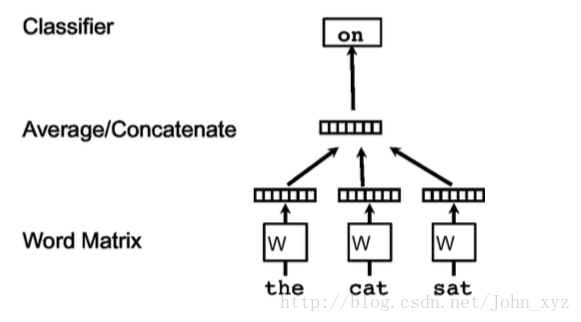

In [161]:
from gensim.models.word2vec import Word2Vec
help(Word2Vec)

Help on class Word2Vec in module gensim.models.word2vec:

class Word2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Word2Vec(sentences=None, corpus_file=None, size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, sample=0.001, seed=1, workers=3, min_alpha=0.0001, sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, hashfxn=<built-in function hash>, iter=5, null_word=0, trim_rule=None, sorted_vocab=1, batch_words=10000, compute_loss=False, callbacks=(), max_final_vocab=None)
 |  
 |  Train, use and evaluate neural networks described in https://code.google.com/p/word2vec/.
 |  
 |  Once you're finished training a model (=no more updates, only querying)
 |  store and use only the :class:`~gensim.models.keyedvectors.KeyedVectors` instance in `self.wv` to reduce memory.
 |  
 |  The model can be stored/loaded via its :meth:`~gensim.models.word2vec.Word2Vec.save` and
 |  :meth:`~gensim.models.word2vec.Word2Vec.load` methods.
 |  
 |  The trained word vectors can a

In [30]:
from gensim.models.word2vec import Word2Vec
from multiprocessing import cpu_count
import gensim.downloader as api

# Download dataset 同上文
dataset = api.load("text8")
data = [d for d in dataset]

# Split the data into 2 parts. Part 2 will be used later to update the model
data_part1 = data[:1000]
data_part2 = data[1000:] # len(data) = 1701

# Train Word2Vec model. Defaults result vector size = 100
model = Word2Vec(data_part1, size = 50, min_count = 0, workers=cpu_count()) # 设定50维的向量表示
# 用的不是bow

2019-12-08 13:56:51,940 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-12-08 13:56:51,941 : INFO : collecting all words and their counts
2019-12-08 13:56:51,941 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-08 13:56:54,361 : INFO : collected 189074 word types from a corpus of 10000000 raw words and 1000 sentences
2019-12-08 13:56:54,362 : INFO : Loading a fresh vocabulary
2019-12-08 13:56:54,959 : INFO : effective_min_count=0 retains 189074 unique words (100% of original 189074, drops 0)
2019-12-08 13:56:54,960 : INFO : effective_min_count=0 leaves 10000000 word corpus (100% of original 10000000, drops 0)
2019-12-08 13:56:55,649 : INFO : deleting the raw counts dictionary of 189074 items
2019-12-08 13:56:55,655 : INFO : sample=0.001 downsamples 38 most-common words
2019-12-08 13:56:55,656 : INFO : downsampling leaves estimated 7563517 word corpus (75.6% of prior 10000000)
2019-12-08 13:56:56,547 : INFO : esti

In [31]:
# Get the word vector for given word
print("the word vetor of 'red':\n",model['red'])
print("-"*80)
print("the most similar words to 'red' is:")
pprint(model.wv.most_similar('red'))
print("-"*80)
print("similarity between 'you' and 'dogs':",model.wv.similarity('dogs','you'))

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
2019-12-08 13:58:18,516 : INFO : precomputing L2-norms of word weight vectors


the word vetor of 'red':
 [-1.8167057   0.31214848  1.5510777   1.3172076  -0.05085691 -0.25171492
  3.0778267   2.9897223  -1.0048205  -0.63615435 -2.5944874  -0.08886711
  0.27089527 -1.1511991  -1.4280657   2.778524    0.6598903   0.47726864
 -2.312254   -1.9911174   0.6913944  -0.7365148   2.4474552   1.503278
 -0.29164532  2.719721    0.21802033 -0.81949115  0.20494053 -0.2663224
 -0.6107203  -2.2972476  -0.5361634  -3.9359937   0.76042545 -1.7228714
  2.5851133   1.1529657   1.0615019  -1.7671105   2.0420425   0.95371026
  1.5539821   0.61625725  1.6416684  -0.7162212  -3.833497    1.7392004
  2.0686471  -1.1600076 ]
--------------------------------------------------------------------------------
the most similar words to 'red' is:
[('blue', 0.8620454668998718),
 ('white', 0.8332118988037109),
 ('black', 0.8290001749992371),
 ('yellow', 0.8134974241256714),
 ('orange', 0.8016897439956665),
 ('green', 0.7898510694503784),
 ('purple', 0.7731848955154419),
 ('grey', 0.72883307933807

* **加入新数据来更新 Word2Vec 模型**
  * **在新数据上使用 `build_vocab()`，再 `train()`**

In [32]:
# Update the model with new data.
model.build_vocab(data_part2, update=True)
model.train(data_part2, total_examples=model.corpus_count, epochs=model.iter)
model['red']

2019-12-08 13:58:35,189 : INFO : collecting all words and their counts
2019-12-08 13:58:35,190 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-12-08 13:58:36,905 : INFO : collected 153347 word types from a corpus of 7005207 raw words and 701 sentences
2019-12-08 13:58:36,905 : INFO : Updating model with new vocabulary
2019-12-08 13:58:37,746 : INFO : New added 153347 unique words (50% of original 306694) and increased the count of 153347 pre-existing words (50% of original 306694)
2019-12-08 13:58:38,975 : INFO : deleting the raw counts dictionary of 153347 items
2019-12-08 13:58:38,979 : INFO : sample=0.001 downsamples 72 most-common words
2019-12-08 13:58:38,980 : INFO : downsampling leaves estimated 10509051 word corpus (150.0% of prior 7005207)
2019-12-08 13:58:39,582 : INFO : estimated required memory for 306694 words and 50 dimensions: 276024600 bytes
2019-12-08 13:58:39,583 : INFO : updating layer weights
E:\anaconda\lib\site-packages\ipykernel_la

array([-2.2481189 ,  2.203746  ,  1.5152522 ,  1.5715194 , -0.11041535,
       -0.5010987 ,  3.1523952 ,  3.0081422 , -0.6679949 , -0.19760051,
       -3.4281852 , -1.3082855 ,  0.9508721 , -1.2423337 , -2.3597414 ,
        3.13672   ,  1.2374016 ,  2.0501041 , -2.144659  , -1.5484809 ,
       -0.5860912 , -1.3154489 ,  1.2575163 ,  0.32076722,  0.49058414,
        2.219185  ,  0.5359557 , -0.7193843 ,  0.456928  ,  0.33530343,
       -0.64713687, -2.7313225 , -2.0454113 , -3.9329267 ,  0.21179105,
       -1.7484479 ,  2.953503  ,  1.1393641 ,  0.7056214 , -1.4966147 ,
        0.90906614,  2.5749114 ,  1.6809809 ,  0.5244291 ,  1.1336749 ,
       -0.62860256, -3.4808996 ,  1.6868737 ,  2.9880254 , -0.9291835 ],
      dtype=float32)

* **保存 / 加载 模型**

In [ ]:
# Save and Load Model
# model.save('newmodel')
# model = Word2Vec.load('newmodel')

* **加载已经训练好的 word embedding models ，并提取词向量**
  * **`gensim.downloader.api` 加载数据集和经典模型，使能够在不需要查找大型文本语料库的情况下直接开始工作。**    
 
* **注意语料库的选择. 例如, 如果需要处理新闻文章，那么使用在Twitter数据集上训练过的embeddings可能是完全合适的, 如果是科学技术相关的文章, 则需要不同的语料库**  

* **加载预训练模型, 详见https://kavita-ganesan.com/easily-access-pre-trained-word-embeddings-with-gensim/#.XdowM4gzYak**

In [33]:
# easily access to pre-trained word-embeddings with gensim
import gensim.downloader as api

# Get information about the model or dataset
api.info('glove-wiki-gigaword-50')

# Download
w2v_model = api.load("glove-wiki-gigaword-50") # 50维表示
w2v_model.most_similar('blue')

2019-12-08 13:59:21,770 : ERROR : caught non-fatal exception while trying to update gensim-data cache from 'https://raw.githubusercontent.com/RaRe-Technologies/gensim-data/master/list.json'; using local cache at 'C:\\Users\\hsx10/gensim-data\\information.json' instead
Traceback (most recent call last):
  File "E:\anaconda\lib\urllib\request.py", line 1317, in do_open
    encode_chunked=req.has_header('Transfer-encoding'))
  File "E:\anaconda\lib\http\client.py", line 1229, in request
    self._send_request(method, url, body, headers, encode_chunked)
  File "E:\anaconda\lib\http\client.py", line 1275, in _send_request
    self.endheaders(body, encode_chunked=encode_chunked)
  File "E:\anaconda\lib\http\client.py", line 1224, in endheaders
    self._send_output(message_body, encode_chunked=encode_chunked)
  File "E:\anaconda\lib\http\client.py", line 1016, in _send_output
    self.send(msg)
  File "E:\anaconda\lib\http\client.py", line 956, in send
    self.connect()
  File "E:\anaconda\

[('red', 0.8901656866073608),
 ('black', 0.8648407459259033),
 ('pink', 0.8452916741371155),
 ('green', 0.8346816301345825),
 ('yellow', 0.8320708274841309),
 ('purple', 0.829311192035675),
 ('white', 0.8225342035293579),
 ('orange', 0.8114303350448608),
 ('bright', 0.799933910369873),
 ('colored', 0.787665605545044)]

In [ ]:
import gensim.downloader as api

# Download the models
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300') # 1G左右
word2vec_model300 = api.load('word2vec-google-news-300') # 1.6G左右
glove_model300 = api.load('glove-wiki-gigaword-300') # 370MB左右

* **评估哪个模型更好,using the respective model’s `evaluate_word_analogies()` on a standard analogies dataset.**
* **questions-words.txt 下载: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/datasets/questions-words.txt**

In [ ]:
# Word2ec_accuracy
word2vec_model300.evaluate_word_analogies(analogies="questions-words.txt")[0]
#> 0.7401448525607863

# fasttext_accuracy
fasttext_model300.evaluate_word_analogies(analogies="questions-words.txt")[0]
#> 0.8827876424099353

# GloVe accuracy
glove_model300.evaluate_word_analogies(analogies="questions-words.txt")[0]
#> 0.7195422354510931

<font color=Green size = 6> **Doc2Vec** </font>  
##   Document to Vector 
* **idea: a vectorised representation of a group of words taken collectively as a single unit, not a simple average of the word vectors of the words in the sentences/paragraphs/documents.** 
* **应用：学出来的向量可以通过计算距离来找 sentences/paragraphs/documents 之间的相似性,或者进一步可以给文档打标签,将向量输入监督式机器学习算法中(如情感分析,垃圾邮件过滤)**

### Distributed Memory Model of Paragraph Vectors(PV-DM)
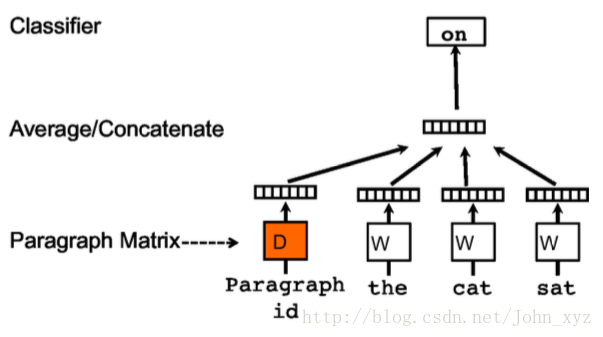

### Paragraph Vector without word ordering: Distributed bag of words (PV-DBOW)
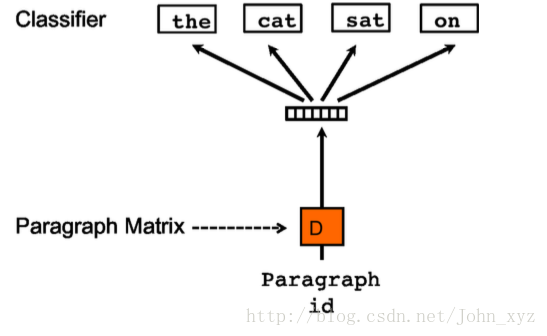

* **PS:The training data for Doc2Vec should be a list of TaggedDocuments. To create one, we pass a list of words and a unique integer as input to the `models.doc2vec.TaggedDocument()`.**

In [175]:
help(gensim.models.doc2vec.TaggedDocument)

Help on class TaggedDocument in module gensim.models.doc2vec:

class TaggedDocument(TaggedDocument)
 |  TaggedDocument(words, tags)
 |  
 |  Represents a document along with a tag, input document format for :class:`~gensim.models.doc2vec.Doc2Vec`.
 |  
 |  A single document, made up of `words` (a list of unicode string tokens) and `tags` (a list of tokens).
 |  Tags may be one or more unicode string tokens, but typical practice (which will also be the most memory-efficient)
 |  is for the tags list to include a unique integer id as the only tag.
 |  
 |  Replaces "sentence as a list of words" from :class:`gensim.models.word2vec.Word2Vec`.
 |  
 |  Method resolution order:
 |      TaggedDocument
 |      TaggedDocument
 |      builtins.tuple
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __str__(self)
 |      Human readable representation of the object's state, used for debugging.
 |      
 |      Returns
 |      -------
 |      str
 |         Human readable representati

In [34]:
# Create the tagged document needed for Doc2Vec
def create_tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield gensim.models.doc2vec.TaggedDocument(list_of_words, [i])

train_data = list(create_tagged_document(data))

print(train_data[:1])
#> [TaggedDocument(words=['anarchism', 'originated', ... 'social', 'or', 'emotional'], tags=[0])]

[TaggedDocument(words=['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first', 'used', 'against', 'early', 'working', 'class', 'radicals', 'including', 'the', 'diggers', 'of', 'the', 'english', 'revolution', 'and', 'the', 'sans', 'culottes', 'of', 'the', 'french', 'revolution', 'whilst', 'the', 'term', 'is', 'still', 'used', 'in', 'a', 'pejorative', 'way', 'to', 'describe', 'any', 'act', 'that', 'used', 'violent', 'means', 'to', 'destroy', 'the', 'organization', 'of', 'society', 'it', 'has', 'also', 'been', 'taken', 'up', 'as', 'a', 'positive', 'label', 'by', 'self', 'defined', 'anarchists', 'the', 'word', 'anarchism', 'is', 'derived', 'from', 'the', 'greek', 'without', 'archons', 'ruler', 'chief', 'king', 'anarchism', 'as', 'a', 'political', 'philosophy', 'is', 'the', 'belief', 'that', 'rulers', 'are', 'unnecessary', 'and', 'should', 'be', 'abolished', 'although', 'there', 'are', 'differing', 'interpretations', 'of', 'what', 'this', 'means', 'anarchism', 'also', 'refers'

In [189]:
help(gensim.models.doc2vec.Doc2Vec)

Help on class Doc2Vec in module gensim.models.doc2vec:

class Doc2Vec(gensim.models.base_any2vec.BaseWordEmbeddingsModel)
 |  Doc2Vec(documents=None, corpus_file=None, dm_mean=None, dm=1, dbow_words=0, dm_concat=0, dm_tag_count=1, docvecs=None, docvecs_mapfile=None, comment=None, trim_rule=None, callbacks=(), **kwargs)
 |  
 |  Class for training, using and evaluating neural networks described in
 |  `Distributed Representations of Sentences and Documents <http://arxiv.org/abs/1405.4053v2>`_.
 |  
 |  Some important internal attributes are the following:
 |  
 |  Attributes
 |  ----------
 |  wv : :class:`~gensim.models.keyedvectors.Word2VecKeyedVectors`
 |      This object essentially contains the mapping between words and embeddings. After training, it can be used
 |      directly to query those embeddings in various ways. See the module level docstring for examples.
 |  
 |  docvecs : :class:`~gensim.models.keyedvectors.Doc2VecKeyedVectors`
 |      This object contains the paragraph

In [35]:
# Init the Doc2Vec model
model = gensim.models.doc2vec.Doc2Vec(vector_size=50, min_count=2, epochs=40)

# Build the Volabulary
model.build_vocab(train_data)

# Train the Doc2Vec model
model.train(train_data, total_examples=model.corpus_count, epochs=model.epochs)

print(model.infer_vector(['australian', 'captain', 'elected', 'to', 'bowl']))

2019-12-08 14:00:35,039 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2019-12-08 14:00:35,130 : INFO : collecting all words and their counts
2019-12-08 14:00:35,131 : INFO : PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
2019-12-08 14:00:38,500 : INFO : collected 253854 word types and 1701 unique tags from a corpus of 1701 examples and 17005207 words
2019-12-08 14:00:38,502 : INFO : Loading a fresh vocabulary
2019-12-08 14:00:38,817 : INFO : effective_min_count=2 retains 135335 unique words (53% of original 253854, drops 118519)
2019-12-08 14:00:38,818 : INFO : effective_min_count=2 leaves 16886688 word corpus (99% of original 17005207, drops 118519)
2019-12-08 14:00:39,314 : INFO : deleting the raw counts dictionary of 253854 items
2019-12-08 14:00:39,322 : INFO : sample=0.001 downsamples 37 most-common words
2019-12-08 14:00:39,323 : INFO : downsampling leaves estimated 12689806 word corpus (75.1% of prior 16886688)
2019-12

[ 0.19452342 -0.39416683  0.05848879  0.49533033  0.19873309 -0.44809815
  0.6501444  -0.1269597  -0.08245764 -0.13712324 -0.6765764   0.04050255
  0.25756496 -0.04113543  0.3044796   0.09757265  0.1731595   0.08430468
  0.3669874  -0.0233873  -0.1322545  -0.16868775  0.15233919 -0.2520285
  0.04270823  0.11387725 -0.3903936  -0.2946977  -0.48800874  0.3269638
 -0.4486425   0.98374045  0.01746692  0.20323774 -0.5019922  -0.06794244
 -0.01790205  0.05994559  0.04520334 -0.07791738 -0.23345554 -0.5676817
  0.39718735  0.15415291 -0.46587673  0.07079805  0.17079633 -0.110955
  0.12404767  0.2873535 ]


In [36]:
# Compute cosine similarity between two docvecs from the training set.
model.docvecs.similarity(0,1)

0.3293861

<font color=Green size = 6> **cosine similarity / soft cosine similarity** </font>  
##  (soft) cosine similarity  - similarity metrics 
### **cos similarity:**
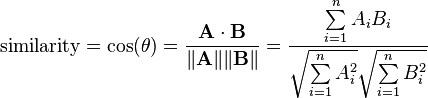


### soft cos similarity: 
* **similar to cosine similarity but in addition considers the semantic relationship between the words through its vector representation.**   
  * **计算方式：首先需要 word embedding model,如 Word2Vec or FastText, 再计算 `similarity matrix`, 将输入的句子转化为 bag-of-words corpus, 并连同 similarity matrix 一起传至 `softcossim()`.**
  * **计算公式: http://www.scielo.org.mx/pdf/cys/v18n3/v18n3a7.pdf**
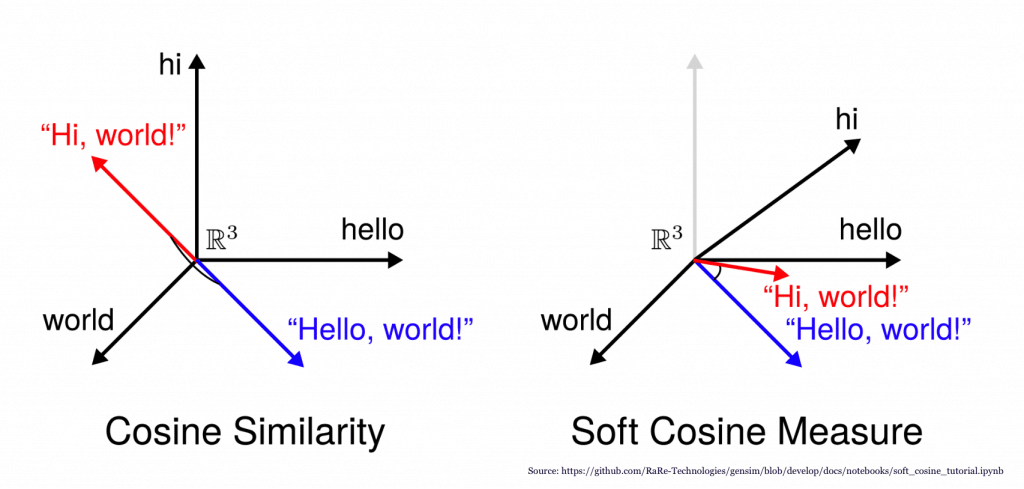

In [37]:
# w2v_model = api.load("glove-wiki-gigaword-50")  # 上文已加载
# 也可使用别的word embedding模型,如将下文的w2v_model替换为更高维的fasttext_model300
# 以下注释的结果为使用fasttext_model300所得,可见结果相差不大

# Which word from the given list doesn't go with the others?
print(w2v_model.doesnt_match(['india', 'australia', 'pakistan', 'china', 'beetroot']))  
#> beetroot

# Compute cosine distance between two words.
print(w2v_model.distance('king', 'queen'))
#> 0.22957539558410645

# Compute cosine distances from given word or vector to all words in `other_words`.
print(w2v_model.distances('king', ['queen', 'man', 'woman']))
#> [0.22957546 0.465837   0.547001  ]

# Compute cosine similarities
print(w2v_model.cosine_similarities(w2v_model['king'], 
                                            vectors_all=(w2v_model['queen'], 
                                                        w2v_model['man'], 
                                                        w2v_model['woman'],
                                                        w2v_model['queen'] + w2v_model['man'])))  
#> array([0.77042454, 0.534163  , 0.45299897, 0.76572555], dtype=float32)
# Note: Queen + Man is very similar to King.

beetroot
0.2160956859588623
[0.21609569 0.4690624  0.5886622 ]
[0.7839043 0.5309376 0.4113378 0.7492941]


E:\anaconda\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [257]:
from gensim.matutils import softcossim
from gensim import corpora

sent_1 = 'Sachin is a cricket player and a opening batsman'.split()
sent_2 = 'Dhoni is a cricket player too He is a batsman and keeper'.split()
sent_3 = 'Anand is a chess player'.split()

# w2v_model = api.load("glove-wiki-gigaword-50")  # 上文已加载

# Prepare a dictionary and a BoW corpus.
documents = [sent_1, sent_2, sent_3]
dictionary = corpora.Dictionary(documents)

sent_1 = dictionary.doc2bow(sent_1)
sent_2 = dictionary.doc2bow(sent_2)
sent_3 = dictionary.doc2bow(sent_3)

# Prepare the similarity matrix
similarity_matrix = w2v_model.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)

# Compute soft cosine similarity
print(softcossim(sent_1, sent_2, similarity_matrix))

print(softcossim(sent_1, sent_3, similarity_matrix))

print(softcossim(sent_2, sent_3, similarity_matrix))

2019-11-27 10:58:52,430 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-11-27 10:58:52,478 : INFO : built Dictionary(14 unique tokens: ['Sachin', 'a', 'and', 'batsman', 'cricket']...) from 3 documents (total 26 corpus positions)
E:\anaconda\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `similarity_matrix` (Method will be removed in 4.0.0, use gensim.models.keyedvectors.WordEmbeddingSimilarityIndex instead).
  from ipykernel import kernelapp as app
2019-11-27 10:58:52,544 : INFO : constructing a sparse term similarity matrix using <gensim.models.keyedvectors.WordEmbeddingSimilarityIndex object at 0x000002131F6B44E0>
2019-11-27 10:58:52,549 : INFO : iterating over columns in dictionary order
2019-11-27 10:58:53,057 : INFO : PROGRESS: at 7.14% columns (1 / 14, 7.142857% density, 7.142857% projected density)
2019-11-27 10:58:59,137 : INFO : constructed a sparse term similarity matrix with 12.244898% density
E:\anaconda\lib\site-packa

0.8550169005700416
0.6639380800670127
0.6498396332029189


E:\anaconda\lib\site-packages\ipykernel_launcher.py:25: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).
E:\anaconda\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: Call to deprecated `softcossim` (Function will be removed in 4.0.0, use gensim.similarities.termsim.SparseTermSimilarityMatrix.inner_product instead).


<font color=Green size = 6> **Summarize Text Documents** </font>  
## Textrank summarization
* **TextRank算法源自于PageRank算法。PageRank算法最初是作为互联网网页排序的方法，经过轻微地改动，可以被应用于文本摘要, 关键词提取。**
* **idea: 基于加权图的无监督算法**
  * **1. 预处理文本：删除停止词并补足剩余的单词。**
  * **2. 创建把句子作为顶点的图。**
  * **3. 通过边缘将每个句子连接到每个其他句子。边缘的重量是两个句子的相似程度。**
  * **4. 在图表上运行PageRank算法。**
  * **5. 选择具有最高PageRank分数的顶点（句子）**
* **在原始TextRank中，两个句子之间的边的权重是出现在两个句子中的单词的百分比。Gensim的TextRank使用Okapi BM25函数来查看句子的相似程度。它是Barrios等人的一篇论文的改进。**
* **TextRank不需要事先对多篇文档进行学习训练, 因其简洁有效而得到广泛应用。**
* **TextRank算法详细介绍: https://mp.weixin.qq.com/s/fGaEYvo3WYKdzA3r8l6O3g**


In [252]:
help(summarize)

Help on function summarize in module gensim.summarization.summarizer:

summarize(text, ratio=0.2, word_count=None, split=False)
    Get a summarized version of the given text.
    
    The output summary will consist of the most representative sentences
    and will be returned as a string, divided by newlines.
    
    Note
    ----
    The input should be a string, and must be longer than :const:`~gensim.summarization.summarizer.INPUT_MIN_LENGTH`
    sentences for the summary to make sense.
    The text will be split into sentences using the split_sentences method in the :mod:`gensim.summarization.texcleaner`
    module. Note that newlines divide sentences.
    
    
    Parameters
    ----------
    text : str
        Given text.
    ratio : float, optional
        Number between 0 and 1 that determines the proportion of the number of
        sentences of the original text to be chosen for the summary.
    word_count : int or None, optional
        Determines how many words will the

In [38]:
from gensim.summarization import summarize, keywords
from pprint import pprint

text = " ".join((line for line in smart_open('E:\sample.txt', encoding='utf-8')))
text

'The think tank of China’s People’s Liberation Army Rocket Force recently recruited 13 Chinese technicians\n  from private companies, PLA Daily reported on Saturday.\n Zhang Hao and 12 other science and technology experts received letters of appointment at the founding ceremony of\n the PLA Rocket Force national defense science and technology experts panel, according to a report published by the\n PLA Daily on Saturday.\n Honored as “rocket force science and technology experts,” Zhang and his fellow experts from private companies will\n serve as members of the PLA Rocket Force think tank, which will conduct research into fields like overall design of\n the missiles, missile launching and network system technology for five years.\n The experts will enjoy the same treatment as their counterparts from State-owned firms, the report said.\n The PLA Daily said that this marks a new development in deepening military-civilian integration in China, which\n could make science and technology inno

In [39]:
# Summarize the paragraph
print("Summarize the paragraph:")
pprint(summarize(text, word_count=20))
print("-"*80)

# Important keywords from the paragraph
print("KEYWORDS:\n\n",keywords(text))

2019-12-08 14:13:13,687 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2019-12-08 14:13:13,689 : INFO : built Dictionary(70 unique tokens: ['armi', 'china’', 'chines', 'forc', 'liber']...) from 11 documents (total 102 corpus positions)
2019-12-08 14:13:13,690 : INFO : Building graph
2019-12-08 14:13:13,690 : INFO : Filling graph
2019-12-08 14:13:13,692 : INFO : Removing unreachable nodes of graph
2019-12-08 14:13:13,692 : INFO : Pagerank graph


Summarize the paragraph:


2019-12-08 14:13:14,009 : INFO : Sorting pagerank scores


('the PLA Rocket Force national defense science and technology experts panel, '
 'according to a report published by the')
--------------------------------------------------------------------------------
KEYWORDS:

 experts
force
zhang
pla
rocket
missiles missile


## 其他 reference / 拓展:

* ★ Gensim Tutorial – A Complete Beginners Guide https://www.machinelearningplus.com/nlp/gensim-tutorial/  
* ★ NLP, Text Mining and Machine Learning starter code to solve real world text data problems. Includes: Gensim Word2Vec, phrase embeddings, keyword extraction with TFIDF, Text Classification with Logistic Regression, word count with pyspark, simple text preprocessing, pre-trained embeddings and more.   https://github.com/kavgan/nlp-in-practice
* 如何计算两个文档的相似度（一）http://www.52nlp.cn/%E5%A6%82%E4%BD%95%E8%AE%A1%E7%AE%97%E4%B8%A4%E4%B8%AA%E6%96%87%E6%A1%A3%E7%9A%84%E7%9B%B8%E4%BC%BC%E5%BA%A6%E4%B8%80
* 如何计算两个文档的相似度（二）http://www.52nlp.cn/%E5%A6%82%E4%BD%95%E8%AE%A1%E7%AE%97%E4%B8%A4%E4%B8%AA%E6%96%87%E6%A1%A3%E7%9A%84%E7%9B%B8%E4%BC%BC%E5%BA%A6%E4%BA%8C
* 从LSA/LSI潜在语义索引到LDA狄利克雷分布 https://www.jianshu.com/p/283691c40fa8
* 用 LDA 和 LSA 两种方法来降维和做 Topic 建模 https://www.leiphone.com/news/201808/4VOdCPirQh4ITqEw.html